In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-
collar','entrepreneur','housemaid','management','retired','self-
employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical:
'divorced','married','single','unknown'; note: 'divorced' means
divorced or widowed)
4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional
5 - default: has credit in default? (categorical:
'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical:
'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb',
'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric).
Important note: this attribute highly affects the output target
(e.g., if duration=0 then y='no'). Yet, the duration is not known
before a call is performed. Also, after the end of the call y is
obviously known. Thus, this input should only be included for
benchmark purposes and should be discarded if the intention is to
have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign
and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was
last contacted from a previous campaign (numeric; 999 means client
was not previously contacted)
14 - previous: number of contacts performed before this campaign
and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign
(categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator
(numeric)
17 - cons.price.idx: consumer price index - monthly indicator
(numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator
(numeric)
21 - y - has the client subscribed a term deposit? (binary:
'yes','no')

<Axes: xlabel='age', ylabel='Count'>

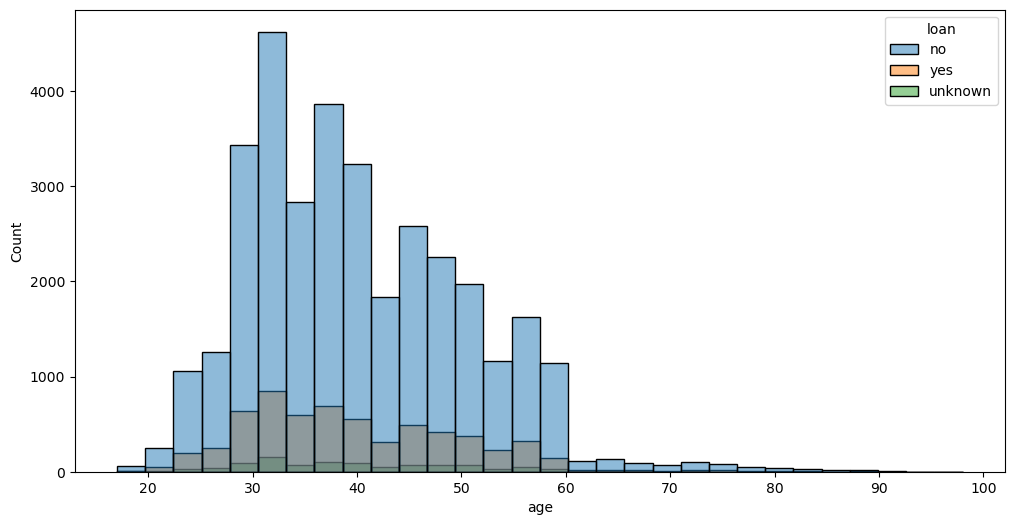

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='age',bins=30, hue = 'loan')

<Axes: xlabel='pdays', ylabel='Count'>

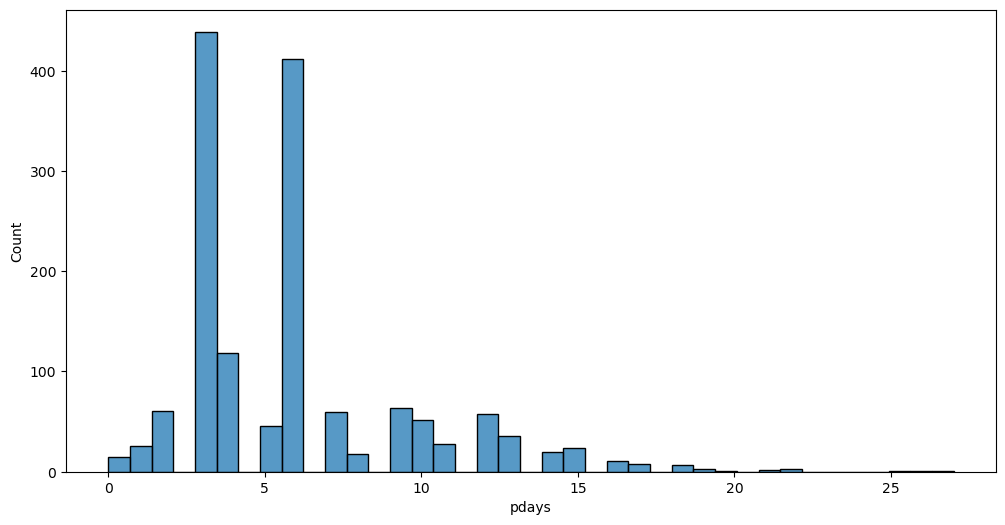

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['pdays']!= 999],x='pdays')

In [11]:
len(df[df['pdays']!= 999])

1515

In [12]:
len(df)

41188

In [13]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

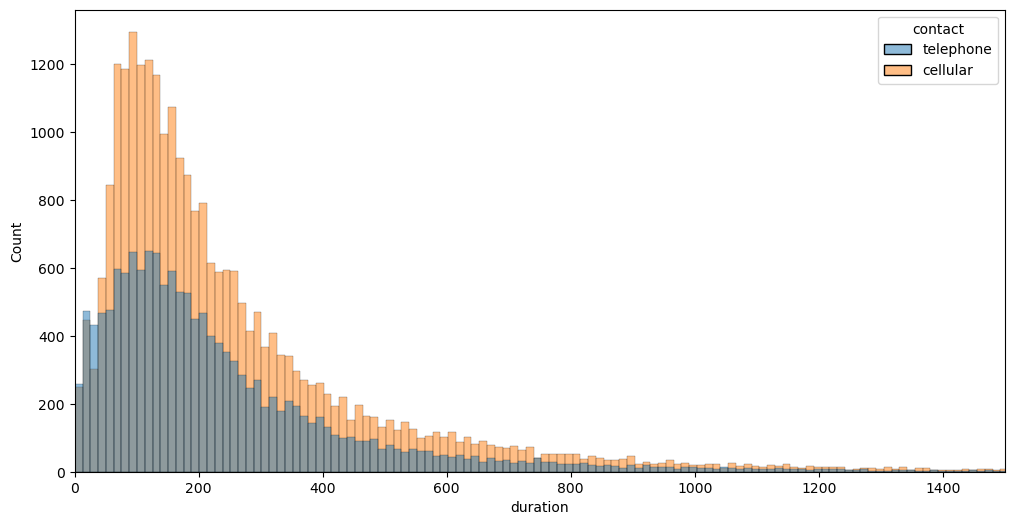

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,1500);

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

<Axes: xlabel='previous', ylabel='count'>

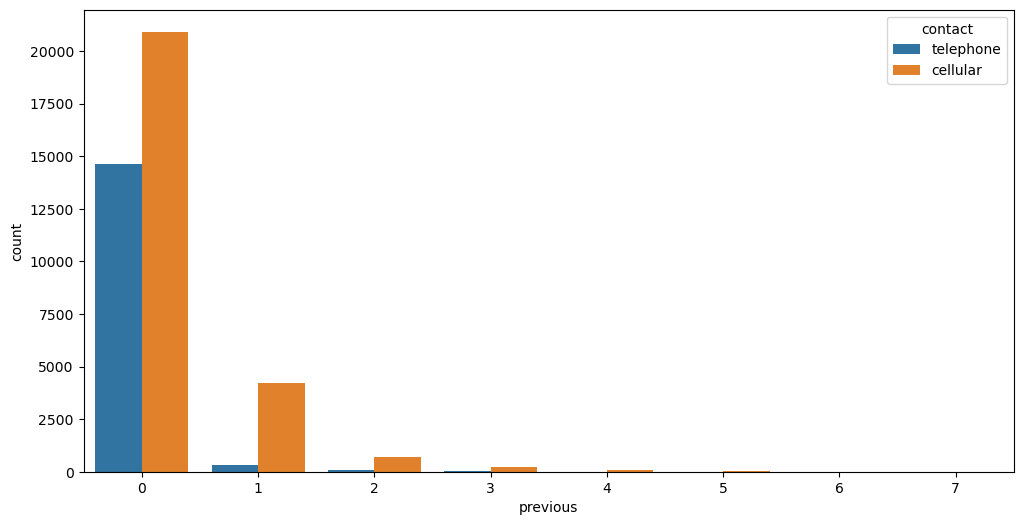

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='previous',hue='contact')

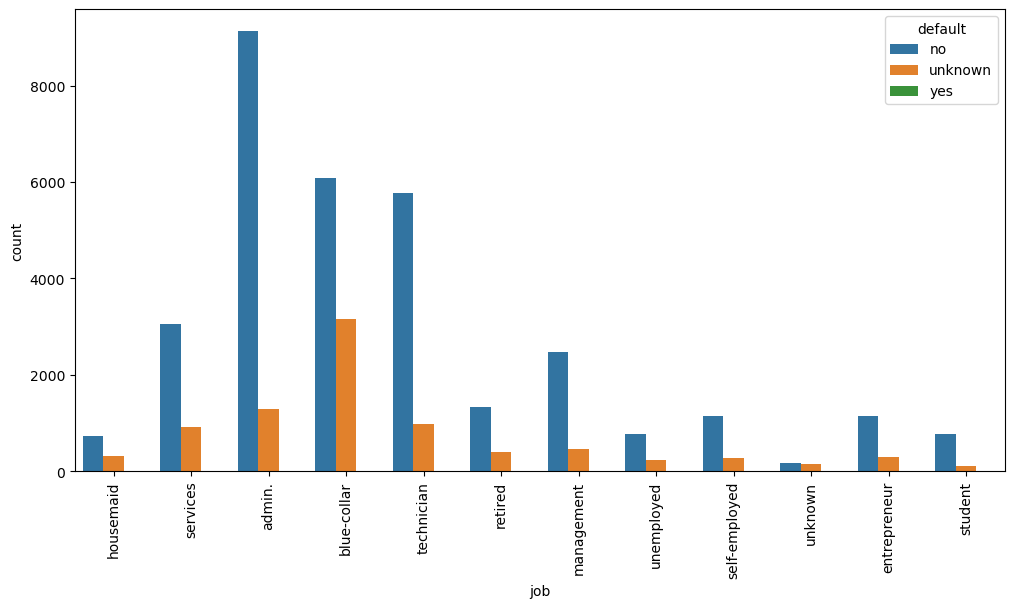

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='job',hue='default')
plt.xticks(rotation=90);

In [23]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

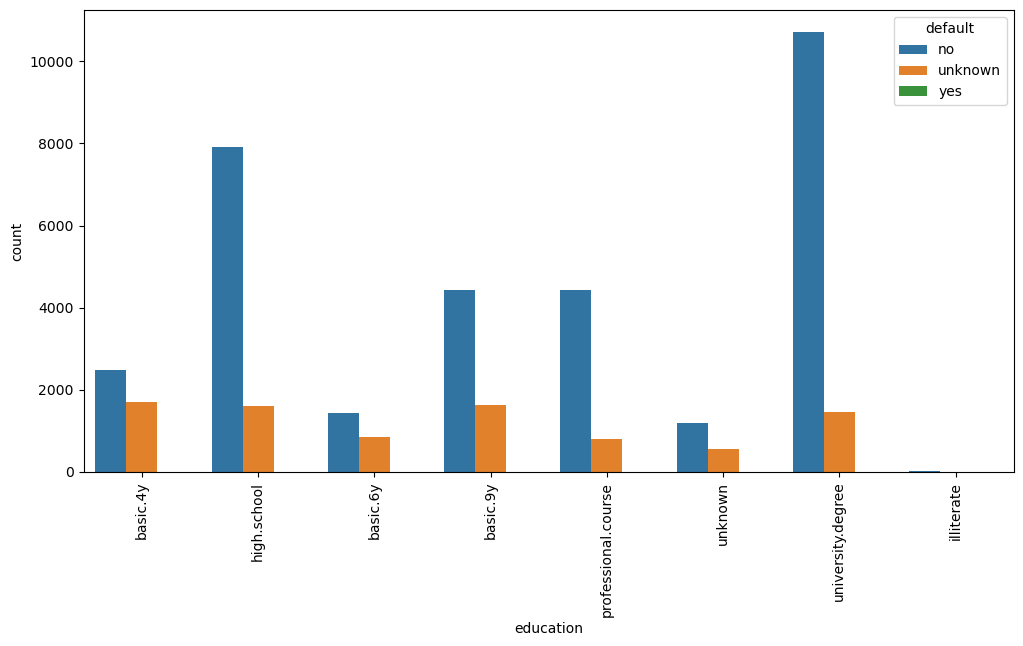

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='education',hue='default')
plt.xticks(rotation=90);

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


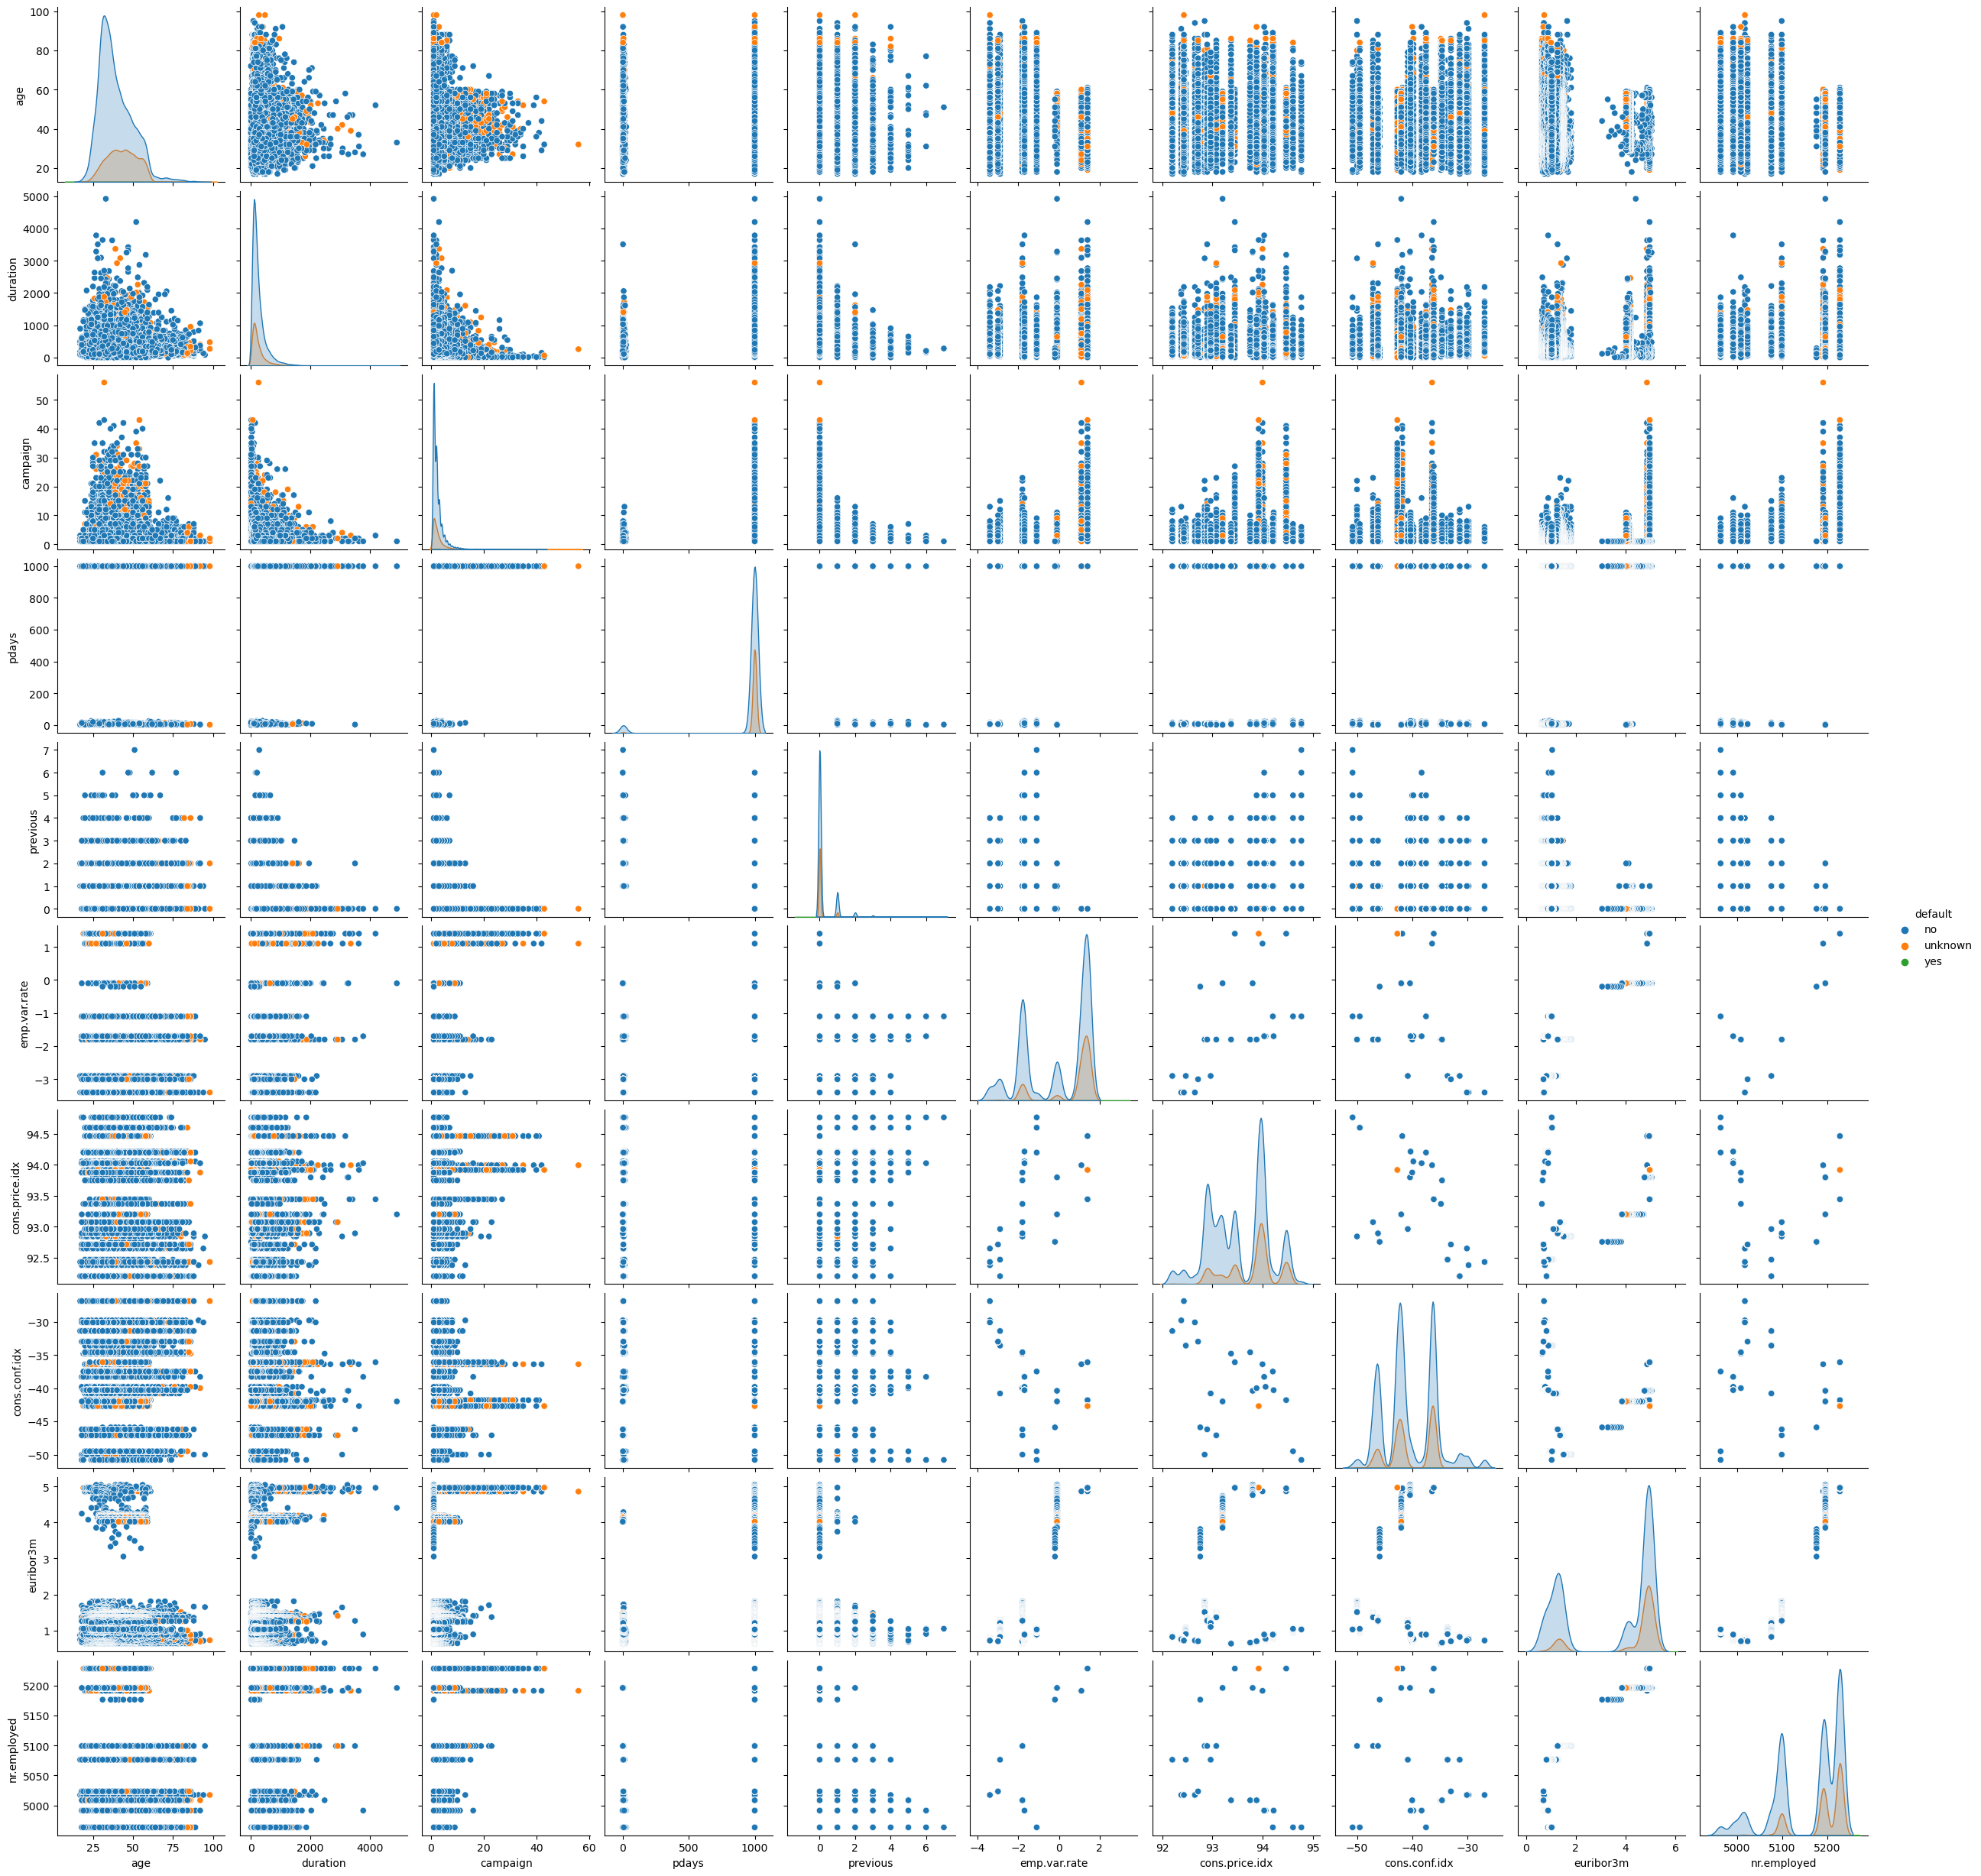

In [26]:
sns.pairplot(df, hue = 'default')

In [27]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [28]:
X = pd.get_dummies(df)
X.shape

(41188, 65)

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_X = sc.fit_transform(X)

In [30]:
from sklearn.cluster import KMeans

In [41]:
model = KMeans(n_clusters=2)
cluster_labels =model.fit_predict(sc_X)
X['Cluster'] = cluster_labels

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
X['Cluster'].value_counts()

Cluster
1    26871
0    14317
Name: count, dtype: int64

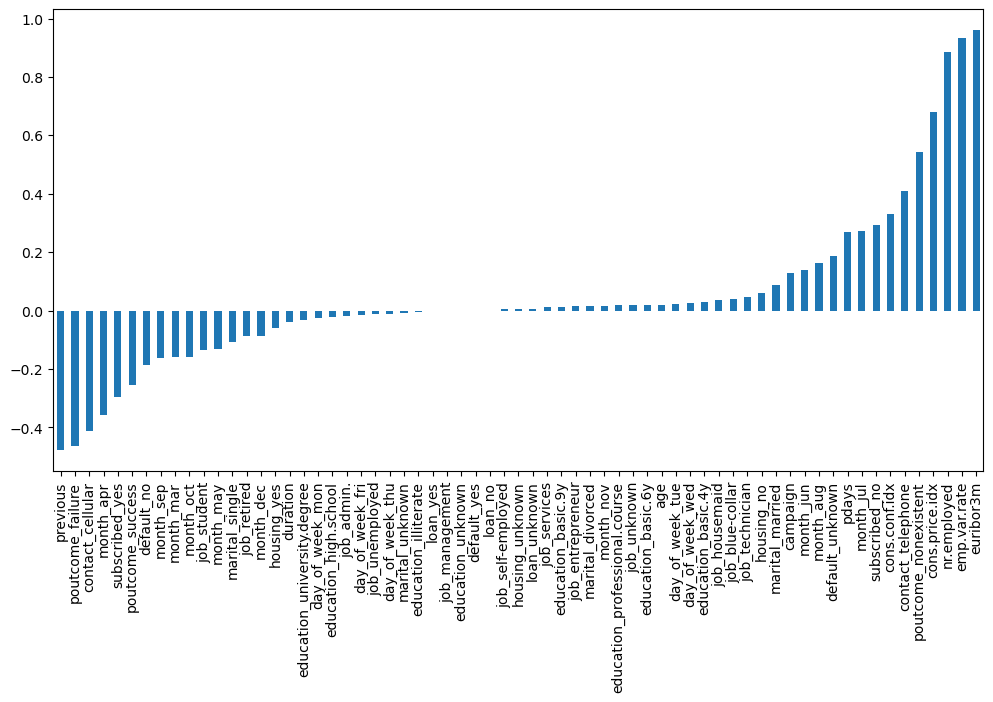

In [46]:
plt.figure(figsize=(12,6))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90);